<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_mar_2020/blob/master/01_Features_Mahotas_Completo_mar_03_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mahotas

In [0]:

!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.integrate import simps
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [0]:
Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
Propriedade='contrast' # aquela q vai calcular os picos e outras informacoes

In [0]:
Transfere='Fotos9Amostras.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
Prop=Propriedade

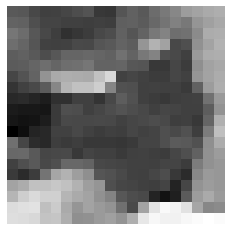

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[5], cmap = "gray")

In [0]:
Num,Row,Col=np.asarray(ww).shape
Idx=[]
New_Colunm=[]

for i in range(Num):
  Media=np.mean(ww[i])
  k=np.where(ww[i].ravel() > Media)
  Idx.append(np.asarray(k).ravel())

Quant=Size*Size
for i in Idx:
  #print(i)
  New_Colunm.append(len(i)/Quant)
print(New_Colunm)

[0.48, 0.4725, 0.39, 0.435, 0.3625, 0.3675, 0.4825, 0.475, 0.515, 0.4975, 0.5, 0.6275, 0.49, 0.5425, 0.4325, 0.4625, 0.4475, 0.6575, 0.5325, 0.4125, 0.5325, 0.39, 0.5175, 0.48, 0.5625, 0.4675, 0.44, 0.54, 0.465, 0.4975, 0.5575, 0.54, 0.46, 0.48, 0.4475, 0.455, 0.3275, 0.4325, 0.4025, 0.4575, 0.5, 0.46, 0.63, 0.4325, 0.505, 0.4425, 0.4425, 0.485, 0.5, 0.5125, 0.5575, 0.4875, 0.43, 0.5625, 0.4475, 0.4625, 0.395, 0.515, 0.4925, 0.4725, 0.4125, 0.41, 0.4225, 0.4825, 0.53, 0.49, 0.38, 0.405, 0.4125, 0.41, 0.53, 0.5775, 0.4675, 0.4675, 0.5, 0.51, 0.53, 0.485, 0.4775, 0.5275, 0.495, 0.5525, 0.48, 0.5275, 0.4325, 0.4575, 0.5475, 0.56, 0.535, 0.5, 0.51, 0.525, 0.44, 0.435, 0.5125, 0.39, 0.565, 0.5075, 0.485, 0.4825, 0.3775, 0.5275, 0.5475, 0.5325, 0.58, 0.4275, 0.41, 0.5175, 0.5225, 0.44, 0.4375, 0.395, 0.535, 0.555, 0.4825, 0.4325, 0.4625, 0.4525, 0.495, 0.4925, 0.3625, 0.375, 0.355, 0.4075, 0.405, 0.465, 0.4575, 0.4725, 0.4825, 0.4375, 0.585, 0.5325, 0.57, 0.4775, 0.4425, 0.4025, 0.45, 0.4625

In [0]:
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
print(len(img_name))

540


In [0]:
# ww contain all photos in black and white
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)


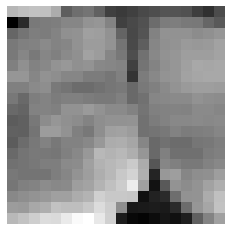

In [0]:
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [0]:
# find df texture for a given picture
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name)   # gotoMahotas junta Mahotas com outros calculos
print(df)

         ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0   0.062114   15.805556  0.118833  ...     2.600961 -0.510280  0.968961
1   0.054688   59.854167 -0.082244  ...     2.712072 -0.621625  0.989078
2   0.052951   90.243056 -0.000144  ...     2.840748 -0.725483  0.995986
3   0.052083   90.388889  0.160040  ...     2.771303 -0.680857  0.993830
4   0.053434   77.562500  0.331489  ...     2.764495 -0.644239  0.991322
5   0.060185   46.638889  0.507428  ...     2.696888 -0.673112  0.992278
6   0.064333   41.708333  0.522625  ...     2.634252 -0.634782  0.988039
7   0.058931   30.319444  0.483757  ...     2.319265 -0.723731  0.995494
8   0.057388   19.104167  0.481467  ...     2.259791 -0.750027  0.996652
9   0.053434   32.263889  0.207233  ...     2.535192 -0.732016  0.996303
10  0.051890   43.611111  0.369478  ...     2.595990 -0.779193  0.997869
11  0.056713   38.555556  0.426907  ...     2.498496 -0.744323  0.996186
12  0.058256   26.868056  0.170268  ...     2.41516

In [0]:
Nomes=list(df.columns)
Nomes_2=[]
for it in Nomes:
  Nomes_2.append(it)
Nomes_2.append('colors') # vai adicionar as variaveis novas 
# caso queria adicionar outra variavel alem de cor tem que modificar
# a lista Nomes_2 com a adicao do nome da variavel a ser adicionada
print(Nomes_2)

['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 'IMC1', 'IMC2', 'colors']


In [0]:
print(Nomes)

['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 'IMC1', 'IMC2']


In [0]:
print(len(df['ASM']))

17


In [0]:
j=0
cont=-1
Posicao_Buraco=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
j=0
cont=-1
Posicao_Grao=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)

j=0
cont=-1
Posicao_Indef=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)

# print(Posicao_Grao)
# print(Posicao_Buraco)
# print(Posicao_Indef)


In [0]:
#print(Posicao_Buraco)

In [0]:
#for i in range(len(Posicao_Buraco)):
#for i in Posicao_Buraco:
#  print(i)

In [0]:
# compara constrast dos tres primeiros buracos

Matriz_X_Buraco=[]

for k in Posicao_Buraco:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    #print(Linha)
    #print("Nomes=",Nomes)
    #print("it=",it)
    #print(df[it])
    Linha.append(np.mean(df[it]))

  Linha.append(New_Colunm[k])
  Matriz_X_Buraco.append(Linha)
  #plt.figure(i+1)
  #plt.plot(df['constrast'])
  #print(Matriz_X_Buraco)
#print(pd.DataFrame(Matriz_X_Buraco))
#Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes)

Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes_2) 
# precisa unir aqui fazer para as fotos sem esquecer de colocar o numero 
# de picos e outras variaveis de interess

In [0]:
print(Linha)
print(len(Linha))
print(Nomes_2)
print(len(Nomes_2))

[0.060990831517792304, 40.85089869281045, 0.22448734562218806, 27.27401336692144, 0.197658746786737, 152.9579248366013, 68.24515477487454, 3.0192123836026887, 4.133855612795869, 0.0021141076274676235, 2.522217365225779, -0.6440596210009903, 0.9869818461903466, 0.385]
14
['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 'IMC1', 'IMC2', 'colors']
14


In [0]:
# compara constrast dos graos

Matriz_X_Grao=[]

for k in Posicao_Grao:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Grao.append(Linha)
#print(pd.DataFrame(Matriz_X_Grao))

Contraste_Grao=pd.DataFrame(Matriz_X_Grao,columns=Nomes_2)


In [0]:
# compara constrast dos indefinidos

Matriz_X_Indef=[]

for k in Posicao_Indef:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Indef.append(Linha)
#print(pd.DataFrame(Matriz_X_Indef))
Contraste_Indef=pd.DataFrame(Matriz_X_Indef,columns=Nomes_2)



In [0]:
print(Contraste_Buraco.head())

        ASM   constrast    correl  ...      IMC1      IMC2  colors
0  0.055885   66.996324  0.325978  ... -0.698158  0.993011  0.4800
1  0.060038   86.345997  0.254951  ... -0.649175  0.983259  0.4725
2  0.056129  130.039216  0.316819  ... -0.738904  0.995701  0.3900
3  0.060032  285.037990  0.349562  ... -0.719246  0.992884  0.4350
4  0.054319  347.037582  0.350965  ... -0.738866  0.994207  0.3625

[5 rows x 14 columns]


In [0]:
print(Contraste_Grao.head())

        ASM    constrast    correl  ...      IMC1      IMC2  colors
0  0.051249   602.328840  0.365643  ... -0.794911  0.998111  0.5000
1  0.051357   358.185458  0.455260  ... -0.786490  0.997785  0.6275
2  0.050410  1091.308415  0.388338  ... -0.805934  0.998271  0.4900
3  0.050449   814.251225  0.409345  ... -0.810067  0.998500  0.5425
4  0.050801   724.794118  0.312578  ... -0.795408  0.998164  0.4325

[5 rows x 14 columns]


In [0]:
print(Contraste_Indef.head())

        ASM   constrast    correl  ...      IMC1      IMC2  colors
0  0.056009  120.755310  0.321776  ... -0.700931  0.993236  0.5325
1  0.052668  321.672386  0.136216  ... -0.754262  0.996182  0.3900
2  0.053195  207.910948  0.321090  ... -0.777385  0.997112  0.5175
3  0.057138  209.535539  0.308492  ... -0.685876  0.990546  0.4800
4  0.068134   77.505310  0.230726  ... -0.597803  0.966357  0.5625

[5 rows x 14 columns]


In [0]:
# found drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
# get csv file
Contraste_Buraco.to_csv('Contraste_Buraco_jan_2020.csv')

In [0]:
# get csv file
Contraste_Grao.to_csv('Contraste_Grao_jan_2020.csv')

In [0]:
# get csv file
Contraste_Indef.to_csv('Contraste_Indef_jan_2020.csv')

In [0]:
# save in drive
!cp Contraste_Buraco_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Grao_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Indef_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/